# Homework 2: Perceptron, Logistic Regression, Stocashtic Gradient Descent



This assignment is due on Moodle by **11:59pm on Friday Sep 25**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- Extra credit questions will not make your homework total scores overflow i.e., not exceed 30% in the final grade. But you can use extra credit in one homework to cover another.

**Acknowledgment** : Chris Ketelsen


**Please put your name and cuidentity username.**

**Name**: Soroush Khadem

**Identity Key**: sokh4726

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

## [40 points] Problem 1 - Perceptron Training

Consider a binary classification problem on the following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

### Part 1 [5 points]
Complete the `perceptron_train` function and report the results.

In [2]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])
data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weights = np.array([0, 0.5, 0.5])
bias = 1

In [3]:
def perceptron_train(data, weights, bias):
    """
    apply transformation and update weights and bias
    :type X: array
    :type y: int
    :type weights: array
    :type bias : int
    :rtype: weights, bias, number of mistakes
    """
    mistakes_count = 0
    for row in data:
        X = np.array(row[:(len(row) -1)])
        y = row[-1]
        # YOUR CODE HERE
        pred = np.dot(weights, X) + bias
        if (pred * y) <= 0:
            # mistake
            mistakes_count += 1
            # Update weights and bias
            weights += (y*X)
            bias += y

    return weights, bias, mistakes_count

#### Part 1 A [2.5 points]
Report the weights, bias, and number of mistakes after the first epoch.

In [4]:
### Do not change or remove this code
weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: 0, mistakes: 5


In [5]:
# for grading - ignore

#### Part 1 B [2.5 points]:
Run the perceptron training for 50 more epochs with the updated weights and report the weights, bias and number of mistakes.

In [6]:
epochs = 50
for i in range(epochs):
    weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [1.  0.5 0.5], bias: -1, mistakes: 4


In [7]:
# for grading - ignore

### Part 2 [5 points] 
Is it possible that your Perceptron classifier would 
ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
Clearly explain your reasoning.

No, since the data is not separable by a plane in 3D, and the perceptron is only capable of separating linearly. See 3D plot below:
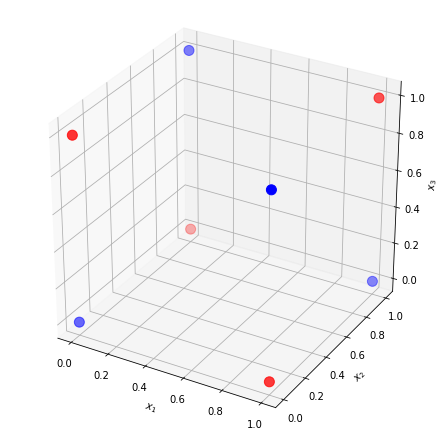
Note: Below is the code used to generate the figure. I inserted a screenshot of the plot so as to avoid auto grade issues (instead of including the code as its own cell):
```
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r' if label == 1 else 'b' for label in data[:,3]]
_ = ax.scatter(data[:,0], data[:,1], data[:,2], marker='o', s=100, color=colors)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$x_3$')
```
Just for fun, here is the learned decision boundary:
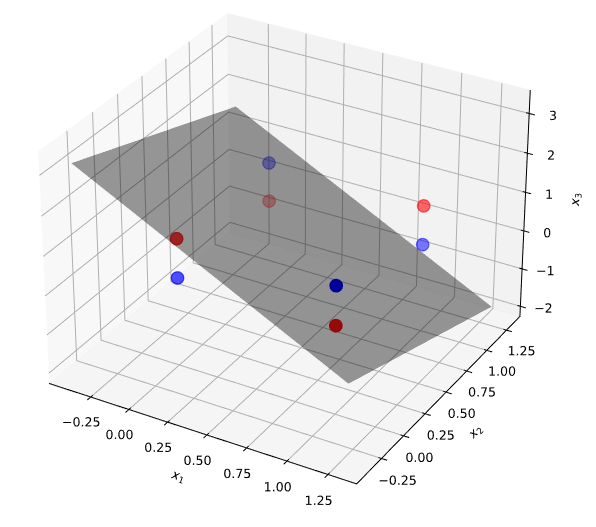
And the code to plot it:
```
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r' if label == 1 else 'b' for label in data[:,3]]
_ = ax.scatter(data[:,0], data[:,1], data[:,2], marker='o', s=100, color=colors)
xx, yy = np.meshgrid(np.arange(-0.4, 1.4, 0.1), np.arange(-0.4, 1.4, 0.1))
z = (1.0 - 1*xx - 0.5*yy) / 0.5
ax.plot_surface(xx, yy, z, alpha=0.4, color='k')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$x_3$')
```

### Part 3 [5 points] 
Does the Perceptron classifier necessarily make the same number of mistakes after the first epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

No, since then the update would push the weights and bias in a different direction. The data is looped through in order, and the weights updated at each step.

###  Part 4 [15 Points]:  Perceptron Classifier on random generated data

Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the `Perceptron` class below.

In [8]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 

        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: Input training features.  Only used for unit testing. 
        :param y: Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0

    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs: Maximum number of epochs to perform before stopping.
        """
        data = np.c_[self.X_train, self.y_train].copy()
        # YOUR CODE HERE
        for epoch in range(max_epochs):
            # Shuffle data
            np.random.shuffle(data)
            self.w, self.b, epoch_mistakes = perceptron_train(data, self.w, self.b)
            if (epoch_mistakes == 0):
                break
            self.num_mistakes += epoch_mistakes


    def plot_model(self, decision_boundary=False):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)
        if decision_boundary:
            # YOUR CODE HERE
            x_plot = np.linspace(np.min(self.X_train), np.max(self.X_train))
            y_plot = (-self.w[0] * x_plot - self.b) / self.w[1]
            ax.plot(x_plot, y_plot, 'k', linewidth=3)
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]

#### Part 4 A [5 points]
The `Perceptron` class above has the capability of generating its own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$). Explain what the `margin` parameter is doing.

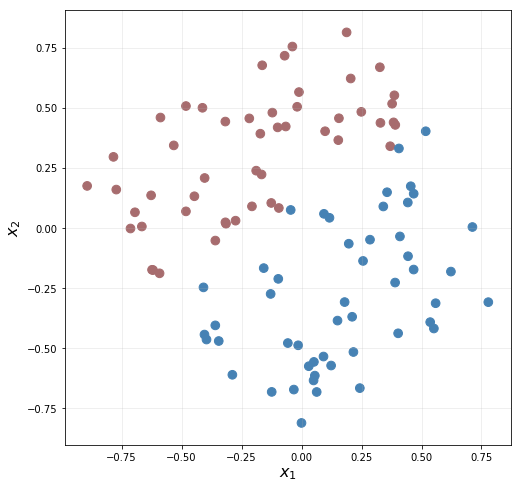

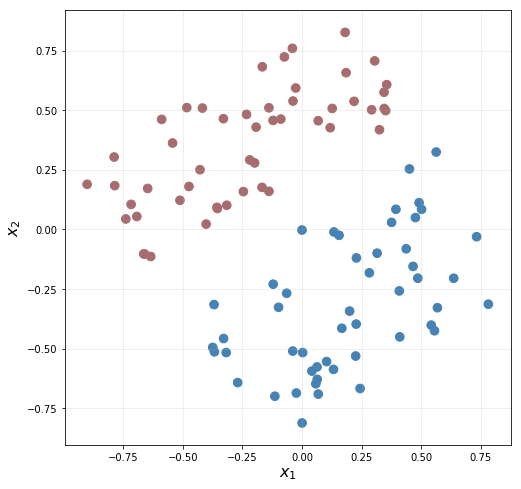

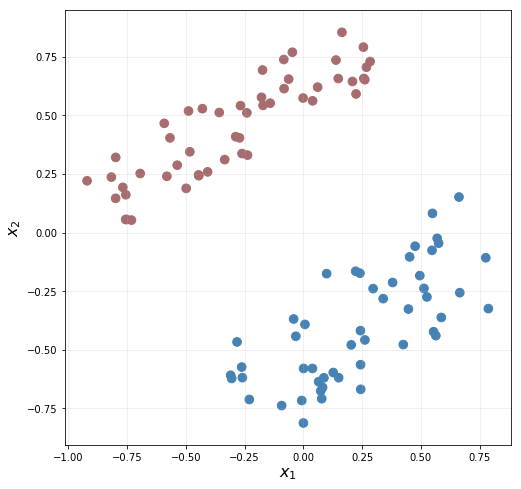

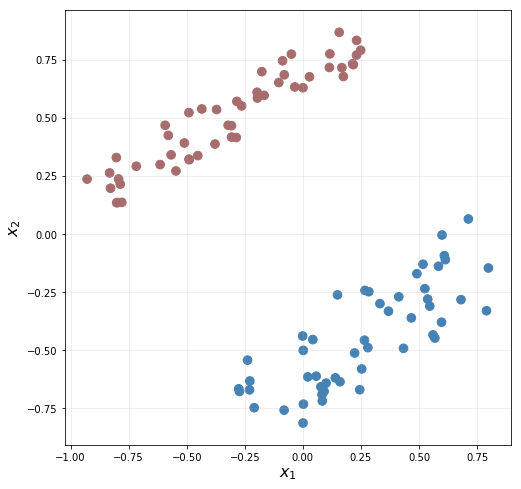

In [9]:
for margin in [0.01, 0.1, 0.3, 0.4]:
    perc = Perceptron(n=100, margin=margin)
    perc.plot_model(decision_boundary=False)

Margin is controlling how separated the points are. That is, the distance to the true decision boundary (without noise).

#### Part 4 B [5 points] 
Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

- Visit all training examples in a random shuffled order over each training epoch.
- Terminate when you finish an epoch without making a single classification error or when you hit the maximum number of epochs.
- Use the `self.num_mistakes` counter to count the total number of classification errors over the entire training process.


Notes:

You should not use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the `max_epochs` parameter as the first step. Later we'll look at training sets that will terminate on their own, but implementing a stopping mechanism will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [10]:
from tests import tests
tests.run_test_suite('prob 1.4B', Perceptron)

TestNegMistake (tests.tests.TestPerceptron) ... ok
TestPosMistake (tests.tests.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


#### Part 4 C [5 points]
Modify the `plot_model` method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. What is the equation of the learned decision boundary? (Use symbols not numbers.)


YOUR ANSWER HERE # TODOSK

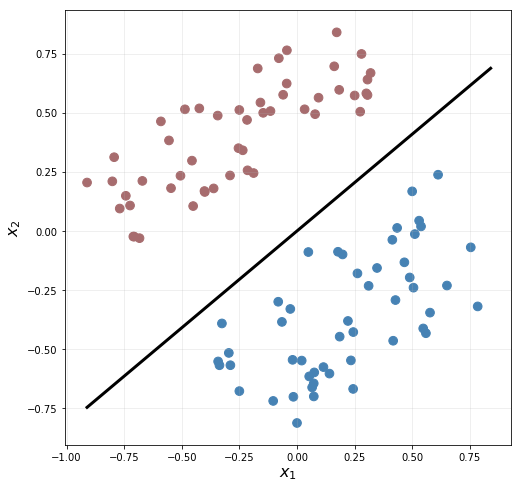

In [11]:
perc = Perceptron(n=100, margin=0.2)
perc.train()
perc.plot_model(decision_boundary=True)

### Part 5 [10 points]

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron algorithm will complete after making at most $1/M^2$ classification mistakes.

Do the following to verify the above statement: 
- Train perceptrons with $n = 100$ and different margins ($M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/M$ on the horizontal axis and the total numbers of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes.

Usually we run multiple simulations and get an averaged total number of mistakes for each margin, but it is fine if you only do once.

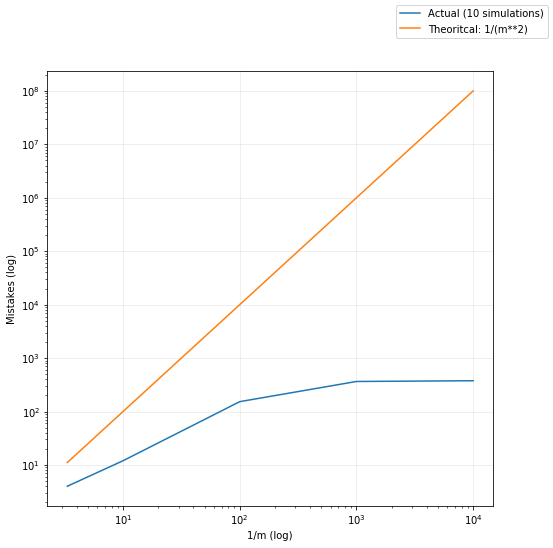

In [12]:
# YOUR CODE HERE
ms = [0.3, 0.1, 0.01, 0.001, 0.0001]
mistakes = []
num_iter = 10
for m in ms:
    iter_mistakes = []
    for _ in range(num_iter):
        perc = Perceptron(n=100, margin=m)
        perc.train()
        iter_mistakes.append(perc.num_mistakes)

    mistakes.append(np.mean(iter_mistakes))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.plot(1/np.array(ms), mistakes)
x_plot = 1/np.array(ms)
y_plot = (x_plot**2)
ax.plot(x_plot, y_plot)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True, alpha=0.25)
ax.set_xlabel('1/m (log)')
ax.set_ylabel('Mistakes (log)')
_ = fig.legend(['Actual (%s simulations)'%num_iter, 'Theoritcal: 1/(m**2)'])

#### Extra Credit [5 points]

* Explain the limitations of the vanilla perceptron implemented above.
* Provide pseudo code/steps to implement Voting Perceptron or Average Perceptron (see the textbook) and discuss the pros and cons (Compare space complexity)

The lmitation of the vanilla perceptron is that the training very much depends on the order of the data passed in. If certain outliers are presented first, the entire training could be messed up. The Voting Perceptron combats this problem by keepeing track of how many steps it takes to update the weight vector. Essentially, when an update should be made, the weights get updated and then copied and used for the next data point. When predicting, a weighted sum using the votes is done, so that the weights that "lasted" longer get a higher weight. This algorithm does a better job of catering to the majority of the data regardless of the ordrer passed in, but has huge space complexity, with a worst case O(nd), with n being the number of data points (huge) and d being the dimensionality.

## [60 points] Problem 2 : Logistic Regression + SGD

In this Problem, you'll implement a Logistic Regression classifier to predict whether person on the Titanic will survive or not.


Dataset has following attributes:

|Variable|Definition|Key|
|:----:|:----:|:---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Age |Age in years	||
|fare	|Passenger fare|	|
|sibsp	|# of siblings / spouses aboard the Titanic| |
|parch	|# of parents / children aboard the Titanic	||
|sex	| Sex|	one hot encoded male, female|
|embarked | Port of Embarkation | one hot encoded C = Cherbourg, Q = Queenstown, S = Southampton|



Following is a class to load the titanic dataset.

In [13]:
# Make sure you have installed pandas and numpy before you run.
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
from collections import defaultdict

class Dataset:
    """
    Class to load dataset containing titanic survival features
    """

    def __init__(self, location, random_state=1241):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        np.random.seed(random_state)
        f = gzip.open(location, 'rb')
        self.train_x, self.train_y, self.test_x, self.test_y = pickle.load(f)
        # appending biases
        self.train_x = np.concatenate((np.ones((self.train_x.shape[0], 1)), self.train_x), axis=1)
        self.test_x = np.concatenate((np.ones((self.test_x.shape[0], 1)), self.test_x), axis=1)
        f.close()
        
    @staticmethod
    def shuffle(X, y):
        """ Shuffle training data """
        shuffled_indices = np.random.permutation(len(y))
        return X[shuffled_indices], y[shuffled_indices]

### Part 1 [5 points]: Implementing sigmoid

#### Part 1 A [4 points] 
First, implement the `sigmoid` function to return the output by applying the sigmoid function $\sigma(z)$ to the input parameter, where the sigmoid function $\sigma(z)$ is defined as:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [14]:
def sigmoid(score, threshold=20.0):
    """
    Sigmoid function with a threshold
    :param score: A real valued number to convert into a number between 0 and 1
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid function result.
    """
    # YOUR CODE HERE
    # Cap the score
    capped_score = min(np.abs(score), threshold)
    # Restore sign
    capped_score *= np.sign(score)
    return (1/(1 + np.exp(-capped_score)))

In [15]:
# verify sigmoid implemention w/ scipy;
# note: you should NOT use scipy for your implementation!
from scipy.stats import logistic
assert sigmoid(1) == logistic.cdf(1)
assert sigmoid(5) == logistic.cdf(5)
assert sigmoid(100, threshold=20) == logistic.cdf(20)
assert sigmoid(-1) == logistic.cdf(-1)
assert sigmoid(-5) == logistic.cdf(-5)
assert sigmoid(-100, threshold=20) == logistic.cdf(-20)

#### Part 1 B [1 point]

Next, implement the derivative of the `sigmoid` function, `sigmoid_grad`, i.e. $\frac{\partial\sigma(x)}{\partial x}$.

Hint: your implementation of `sigmoid_grad` should be able to use  your `sigmoid` function to compute the derivative!

In [16]:
def sigmoid_grad(y, threshold=20.0):
    """
    Derivative/gradient of the sigmoid function.
    :param y: A real valued input for which to compute the derivative.
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid derivative function result.
    """
    # YOUR CODE HERE
    # Doing some calculations by hand, d/dx (sigmoid) = sigmoid * (1 - sigmoid)
    return sigmoid(y, threshold) * (1 - sigmoid(y, threshold))

In [17]:
# verify sigmoid_grad using numerical differentiation, i.e: f(x+h)-f(x-h) / 2h
epsilon = 1.0E-8
assert np.isclose(sigmoid_grad(1.0), (sigmoid(1.0 + epsilon) - sigmoid(1.0 - epsilon)) / (2.0*epsilon))
assert np.isclose(sigmoid_grad(0.1), (sigmoid(0.1 + epsilon) - sigmoid(0.1 - epsilon)) / (2.0*epsilon))

### Part 2 [35 points]

#### Part 2 A [15 points]

The negative log likelihood objective is defined as:
$$
\textrm{NLL}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] 
$$

First, write down the derivative of the negative log likelihood objective function, with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for  $n=1$.

Since $n = 1$:
$$
\frac{\partial}{\partial\beta}\textrm{NLL}(\boldsymbol{\beta}) = -\frac{y_1\cdot\sigma'(\boldsymbol{\beta}^T{\bf x}^{(1)})\cdot{\bf x}^{(1)}}{\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})} + \frac{(1-y_1)\cdot\sigma'(\boldsymbol{\beta}^T{\bf x}^{(1)})\cdot{\bf x}^{(1)}}{(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(1)}))}
$$
Simplifying using the shorthand for the derivative of sigmoid:
$$
= -y_1\cdot(1-\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)}))\cdot{\bf x}^{(1)} + (1-y_1)\cdot\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})\cdot{\bf x}^{(1)}
$$
Distributing:
$$
= -y_1\cdot{\bf x}^{(1)}+y_1\cdot{\bf x}^{(1)}\cdot\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})) + \cdot\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})\cdot{\bf x}^{(1)} - y_1\cdot\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})\cdot{\bf x}^{(1)}
$$
Cancelling some terms:
$$
= -y_1\cdot{\bf x}^{(1)} + \cdot\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})\cdot{\bf x}^{(1)}
$$
Collecting like terms:
$$
= -[y_1-\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})]\cdot{\bf x}^{(1)}
$$

Next, using the `sigmoid` function implemented earlier, finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly without regularization.

In [18]:
import math
class LogReg:
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: learning rate
        """
        self.w = np.zeros(num_features)
        self.eta = eta

    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, compute the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """

        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = sigmoid(self.w.dot(x_i))
            if y == 1:
                logprob += math.log(p)
            else:
                logprob += math.log(1.0 - p)

            # Get accuracy
            if abs(y - p) <= 0.5:
                num_right += 1

        return logprob, float(num_right) / float(len(examples_y))

    def sgd_update(self, x_i, y, lam = 0.0):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :param lam : regularization term
        :return: Return the new value of the regression coefficients
        """

        # YOUR CODE HERE
        # Making a prediction
        pred = sigmoid(self.w.dot(x_i))
        # Regularization. Note that the bias term (self.w[0]) is omitted
        reg_term = 2 * lam * self.w[1:]
        # Prepend with 0 so as to not regularize bias and match dimensions
        reg_array = np.append(0, reg_term)
        # Update in the direction of the gradient, scaling by learning rate
        self.w += self.eta * ( ((y - pred) * x_i) - reg_array )
        return self.w
        

In [19]:
from tests import tests
tests.run_test_suite('prob 2A', LogReg)

testPosUnregUpdate (tests.tests.TestLogReg) ... ok
testNegUnregUpdate (tests.tests.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


#### Part 2 B [15 points]
Complete the code below to loop over the training data and perform stochastic gradient descent for a pre-defined number of epochs. You do not need to use the parameters lam and decay for this part.

Note: remember to shuffle your training data using `Dataset.shuffle` at the beginning of each epoch.

In [20]:
def train(epochs, eta, store_epoch, lam=0, decay=0):
    """
    Train a LogReg object for a set number of epochs with a given eta.
    
    Return three lists
    Two lists keep track of training and test accuracy after every store_epoch epochs
    
    The third list keeps track of learning rate after every store_epoch epochs. All values in this list 
    will be the same if decay = 0 (Only required for Part 2F)
    
    With store_epoch = 100, you would store accuracies after epochs = 100, 200....
    
    :param epochs: total number of training epochs
    :param eta: learning rate
    :param store_epoch: store training and test accuracies every print_epoch epochs
    :param lam: weight given to regularization term. 
    :param decay: Used to update learning rate during training (Part 3). 
                  Equals 0 when learning rate is constant throughout training (Part 2). 
    """
    
    dataset_handler = Dataset('./data/titanic.pklz')
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    assert dataset_handler.train_x.shape == (796,11)
    assert dataset_handler.test_x.shape == (200,11)
    
    train_accuracy_array = []
    test_accuracy_array = []
    learning_rates = []
    for epoch in range(epochs):
        # NOTE: It may be helpful to call upon the 'progress' method in the LogReg class
        # to make sure the algorithm is truly learning properly on both training and test data
        # YOUR CODE HERE
        
        # Shuffle data
        train_x, train_y = dataset_handler.shuffle(dataset_handler.train_x, dataset_handler.train_y)

        for (xi, yi) in zip(train_x, train_y):
            lr.sgd_update(xi, yi, lam)

        if (epoch % store_epoch == 0):
            _, train_acc = lr.progress(train_x, train_y)
            _, test_acc = lr.progress(dataset_handler.test_x, dataset_handler.test_y)

            train_accuracy_array.append(train_acc)
            test_accuracy_array.append(test_acc)
            learning_rates.append(lr.eta)

        # Decay learning rate
        lr.eta = lr.eta / (1 + decay * epoch)
    
        

    return train_accuracy_array, test_accuracy_array, learning_rates

In [21]:
eta  = 1e-3
epochs = 500
store_epoch = 100

train_acc, test_acc, _ = train(epochs, eta, store_epoch)

for i in range(len(train_acc)):
    print("train accuracy after {} epochs: {}".format((i+1)*store_epoch, train_acc[i]))
    print("test accuracy after {} epochs: {}".format((i+1)*store_epoch, test_acc[i]))
    

train accuracy after 100 epochs: 0.5
test accuracy after 100 epochs: 0.52
train accuracy after 200 epochs: 0.7525125628140703
test accuracy after 200 epochs: 0.715
train accuracy after 300 epochs: 0.7525125628140703
test accuracy after 300 epochs: 0.74
train accuracy after 400 epochs: 0.7550251256281407
test accuracy after 400 epochs: 0.755
train accuracy after 500 epochs: 0.757537688442211
test accuracy after 500 epochs: 0.725


#### Part 2 C [5 points]
What is the role of the learning rate? What are the pros and cons of high/low learning rates? Do you see any trade-off? First, plot accuracies of different $\eta$s together vs. number of epochs for both training and testing. Then briefly elaborate on these questions.

In [22]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}

epochs = 1500
store_epoch = 50
for eta in [1e-3, 1e-4, 1e-5, 1e-6]:
    # You need to store accuracy arrays obtained in the dictionaries provided 
    # above (train_results and test_results)
    
    # Effectively, you will be creating a mapping between eta -> train/test_accuracy_array 
    # Therefore, running train_results[eta] should return the train_accuracy_array for that value
    # of eta and likewise for test_results[eta].
    
    # YOUR CODE HERE
    train_acc, test_acc, _ = train(epochs, eta, store_epoch)
    train_results[eta] = train_acc
    test_results[eta] = test_acc

Plot training results below.

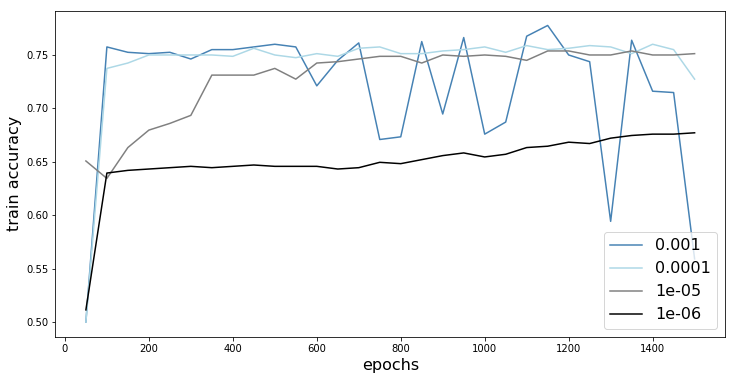

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch, epochs, store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, train_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, train_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, train_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

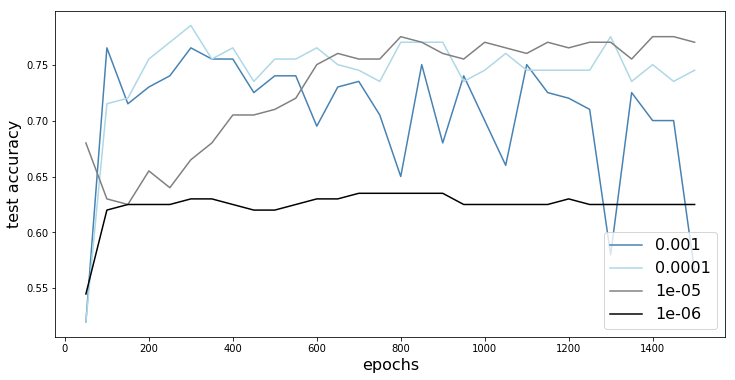

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, test_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, test_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, test_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, test_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

With a higher learning rate, the convergence is faster. The light blue and steel blue lines (highest learning rates) shoot up initially, getting to higher accuracy in less epochs. However, with a higher learning rate, the convergence is unstable. That is, the accuracy can fluctuate as training continues, since the updates are so large they can skip over minima in the space of the objctive function. In the end, a learning rate of $\eta = 0.00001$ had the highest accuracy on test data

#### Part 2 D [10 points]

Adding $l_2$ regularization to the feature parameters for NLL loss gives:

$$
\textrm{NLL}_{l_2}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] + \lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2
$$

where $p$ is the number of features, and $\beta_0$ is the bias term. Notice that $\beta_0$ is not included in the regularization term.

Write down the derivative of the regularized negative log likelihood loss function $\textrm{NLL}_{l_2}$ with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for $n=1$.

Since derivate is a linear operator, we can simply apply it to the regularization term, and combine that with the derivate found above:
$$
\frac{\partial}{\partial\beta} \textrm{NLL}_{l_2}(\boldsymbol{\beta}) = -[y_1-\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})]\cdot{\bf x}^{(1)} + \frac{\partial}{\partial\beta}\lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2
$$
Applying the derivative through the summation:
$$
= -[y_1-\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})]\cdot{\bf x}^{(1)} + \lambda\displaystyle\sum_{k=1}^{p} \frac{\partial}{\partial\beta}\beta_{k}^2
$$
Simple derivate:
$$
= -[y_1-\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})]\cdot{\bf x}^{(1)} + \cdot\lambda\displaystyle\sum_{k=1}^{p} 2\cdot\beta_{k}
$$
Pull 2 out of sum:
$$
= -[y_1-\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})]\cdot{\bf x}^{(1)} + 2\cdot\lambda\displaystyle\sum_{k=1}^{p} \beta_{k}
$$


Update your implementation of the `sgd_update` method so that it performs regularized SGD updates of the model parameters to minimize the regularized NLL loss function.

Remember, do **not** regularize the bias parameter $\beta_0$.

Provide train and test accuracy after above change with `lam=1e-5`.

In [25]:
from tests import tests
tests.run_test_suite('prob 2E', LogReg)

testNegRegUpdate (tests.tests.TestLogReg) ... ok
testPosRegUpdate (tests.tests.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


#### Part 2 E [5 points]
Update your implementation of train() to incorporate a regularization term. The change should typically be on only one line in your code.

Plot accuracies of different $\lambda$s together vs. epochs for both training and testing).

In [26]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}
epochs = 1500
eta = 1e-5
store_epoch = 50
for lam in [0, 0.01, 0.1, 0.05]:
    # You need to store accuracy arrays obtained in the dictionaries provided 
    # above (train_results and test_results)
    
    # Effectively, you will be creating a mapping between lambda -> train/test_accuracy_array 
    # Therefore, running train_results[lam] should return the train_accuracy_array for that value
    # of lam and likewise for test_results[lam].
    
    # YOUR CODE HERE
    train_acc, test_acc, _ = train(epochs, eta, store_epoch, lam)
    train_results[lam] = train_acc
    test_results[lam] = test_acc

Plot training results below.

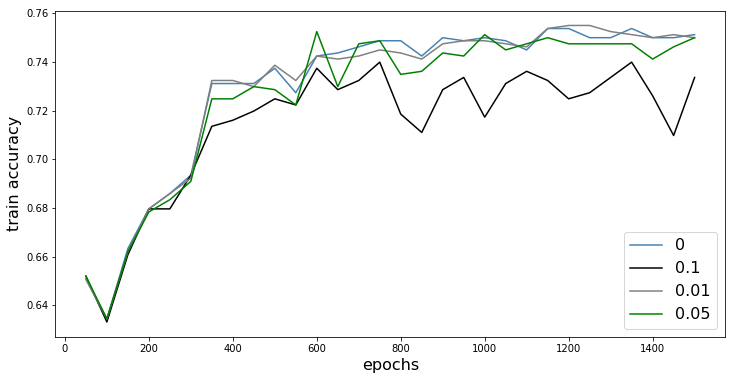

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, train_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, train_results[1e-2], color="grey", label=str(1e-2))
ax.plot(epochs_array, train_results[5e-2], color="green", label=str(5e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

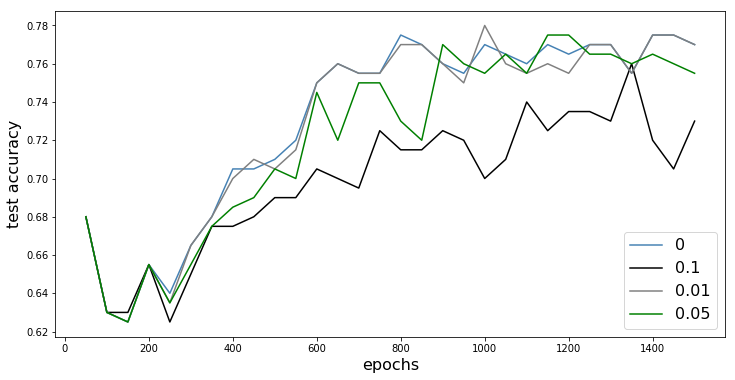

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, test_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, test_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, test_results[1e-2], color="grey", label=str(1e-2))
ax.plot(epochs_array, test_results[5e-2], color="green", label=str(5e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

**Part 2 F (continued)** What is the effect of regularization term with respect to accuracy? 

Regularization is essentially a penality for large changes in the parameters, so it helps to "smooth" the evolution of the parameters. Thus, the accuracy jumps around less during training on the training set's accuracy. In addition, it leads to the best performance on the test set since the model does not overfit to the training data.

### Part 3 [5 points] 

Time based Learning Rate is dynamic learning rate given the following equation:

$\textrm{LearningRate} = \eta\, / \,(1 + \textrm{decay} \cdot \textrm{current epoch})$

Train SGD with the dynamic learning rate defined above and follow these instructions:
* Use initial learning rate $\eta = 0.1$.
* Use $\textrm{decay} = 0.001$.
* Update learning rate `lr.eta` every epoch.
* Plot train accuracy and learning rate together for each epoch.

The above can be accomplished by changing one line in `train()` from Part 2a. 

In [29]:
eta  = 1e-1
epochs = 200
store_epoch = 1

# Lists required for plotting
train_accuracy_array = None
learning_rates = None

# YOUR CODE HERE
train_accuracy_array, _, learning_rates = train(epochs, eta, store_epoch, decay=0.001)

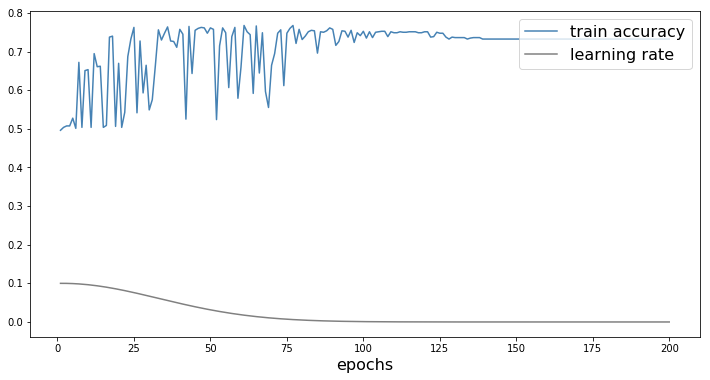

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(1,epochs)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_accuracy_array, color="steelblue", label=str('train accuracy'))
ax.plot(epochs_array, learning_rates,color="grey", label=str('learning rate'))
ax.legend(loc="upper right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("", fontsize=16)
plt.show()

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://docs.google.com/forms/d/e/1FAIpQLSfa22OUdAI2LDrK8LA2ldPBEW08-2wM8oVDkeNr528UCijdLA/viewform?usp=pp_url) to solicit your feedback for how to improve the course.